In [5]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2


In [4]:
import matplotlib.pyplot as plt

In [4]:
#mobile net is pre-trained model for image recognition and object analysis. It`s frozen model is avilable in public as a .pb 
# file. We have used that, as mentioned below. It required some additional configurations, which is provided by the pbtext file
config_file='C:/KDU/Semester 5/IPCV/object detection/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='C:/KDU/Semester 5/IPCV/object detection/frozen_inference_graph.pb'

In [1]:
# create instance of dnn_DetectionModel for object detection using MobileNet

model = cv2.dnn_DetectionModel(
    model=frozen_model,
    config=config_file
)

NameError: name 'cv2' is not defined

In [2]:
import cv2


In [5]:
# create instance of dnn_DetectionModel for object detection using MobileNet

model = cv2.dnn_DetectionModel(
    model=frozen_model,
    config=config_file
)

In [6]:
# initialize empty list to store object labels
class_labels = []

# load labels for objects from text file
file_name = "C:/KDU/Semester 5/IPCV/object detection/labels.txt"
with open (file_name,"rt") as fpt:
    class_labels = fpt.read().rstrip("\n").split("\n")

print(class_labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
# setup preprocessing steps for input data

model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002014546ADD0>

In [9]:
import matplotlib.pyplot as plt


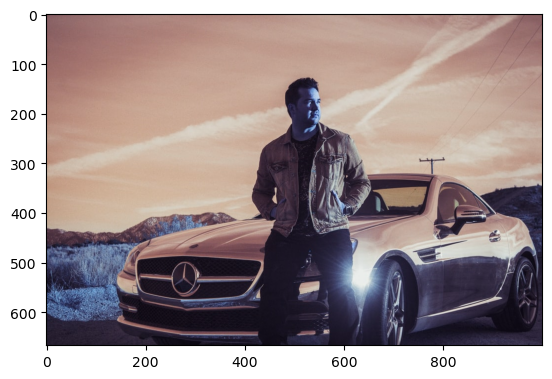

In [21]:
# load sample image
img = cv2.imread("C:/KDU/Semester 5/IPCV/object detection/man-and-car.jpg")

# display image
plt.imshow(img)

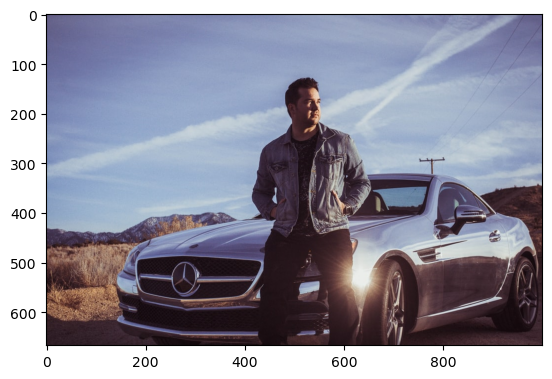

In [22]:
# swap red and blue color channels of image
converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display processed image
plt.imshow(converted_img)

In [23]:
# detect objects in the image using the MobileNet model
class_index, confidence, bounding_box_coordinates = model.detect(img, confThreshold=0.5)

# show model outputs
print(class_index)

[1 3]


In [24]:
for class_index, confidence, bounding_boxes in zip(class_index.flatten(), confidence.flatten(), bounding_box_coordinates):
    
    # draw bounding boxes on detected objects
    cv2.rectangle(
        img,                # the image on which the bounding boxes must be drawn
        bounding_boxes,     # the positions and sizes of the bounding boxes
        (255,0,0),          # the color of the bounding boxes (in this case, blue)
        2                   # the thickness of the lines in the bounding boxes
    )
    
    # label the bounding boxes with the relevant class labels
    cv2.putText(
        img,                                              # the image on which the bounding boxes are drawn
        class_labels[class_index-1],                      # the relevant class labels (obtained from the `class_index` list)
        (bounding_boxes[0]+10, bounding_boxes[1]+40),     # the location of the labels (near the top-left corner of the bounding boxes)
        fontFace=cv2.FONT_HERSHEY_PLAIN,                  # the font of the labels on the bounding boxes
        fontScale=2,                                      # the font size of the labels
        color=(0,255,0),                                  # the font color of the labels
        thickness=3                                       # the thickness of the text of the labels
    )  

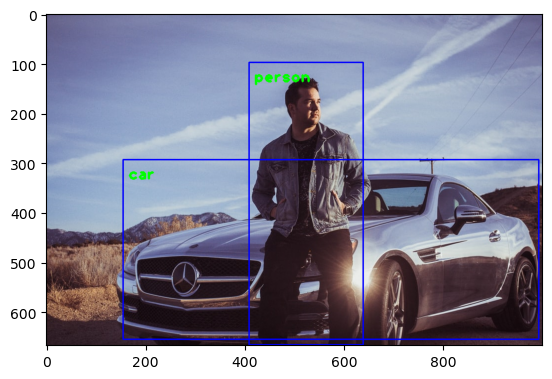

In [25]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))